In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
from qiskit import *

In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=e6b6d763cf9c132a7a30cf0d59e45fa399a4ffb9ceea95a2984b3ad5b8191a9b
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
%matplotlib inline

In [ ]:
%%bash
pip3 install gymnasium[classic_control]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 42.2 MB/s eta 0:00:00


In [ ]:
!pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 26.5 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512546 sha256=f65f697e4078ff21a922f213d021a1138c18f383974344cc2b342ada3391a682
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
!pip install qiskit-algorithms

In [ ]:
!pip install qiskit.utils

  Preparing metadata (setup.py) ... done
  Created wheel for qiskit.utils: filename=qiskit_utils-1.2.1-py3-none-any.whl size=6544 sha256=ae822c0911b55ba713881a2ab56f211107d1d53f543e9de04182e3f8079f273b
  Stored in directory: /root/.cache/pip/wheels/53/4a/ad/77d3cd72c62e79da4e674b809e43b0e576d630e53f3870f4d9
Successfully built qiskit.utils


In [ ]:
import gymnasium as gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Necessary imports

import numpy as np
import matplotlib.pyplot as plt
from torch.nn import Linear, Module, Conv2d, Dropout2d, NLLLoss, MaxPool2d, Flatten, Sequential, ReLU

from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2, ZFeatureMap
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.connectors import TorchConnector
#from qiskit.utils import algorithm_globals
from qiskit_algorithms.utils import algorithm_globals

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

#from qiskit.utils import algorithm_globals
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.connectors import TorchConnector

# Set seed for random generators
algorithm_globals.random_seed = 42
torch.backends.cudnn.benchmark = True

env = gym.make("CartPole-v1").unwrapped

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if GPU is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device: ", device)

Using device:  cpu


In [ ]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

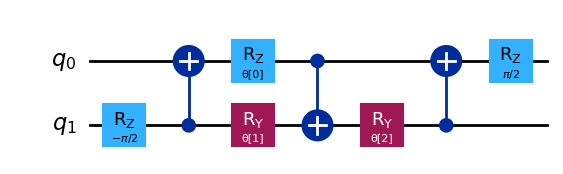

In [ ]:
from qiskit.circuit import ParameterVector
import numpy as np

# We now define a two qubit unitary as defined in [3]
def conv_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)
    target.cx(1, 0)
    target.rz(np.pi / 2, 0)
    return target


# Let's draw this circuit and see what it looks like
params = ParameterVector("θ", length=3)
circuit = conv_circuit(params)
circuit.draw("mpl")

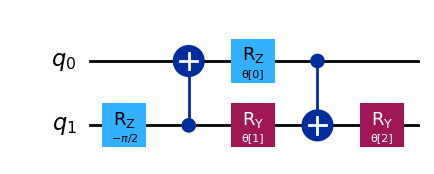

In [ ]:
def pool_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)

    return target


params = ParameterVector("θ", length=3)
circuit = pool_circuit(params)
circuit.draw("mpl")

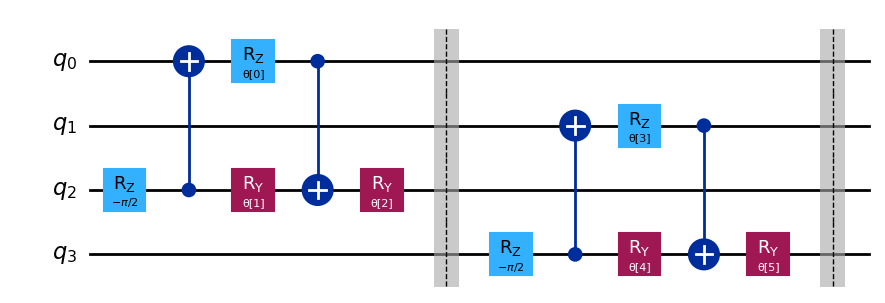

In [ ]:
def pool_layer(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, range(num_qubits))
    return qc


sources = [0, 1]
sinks = [2, 3]
circuit = pool_layer(sources, sinks, "θ")
circuit.decompose().draw("mpl")

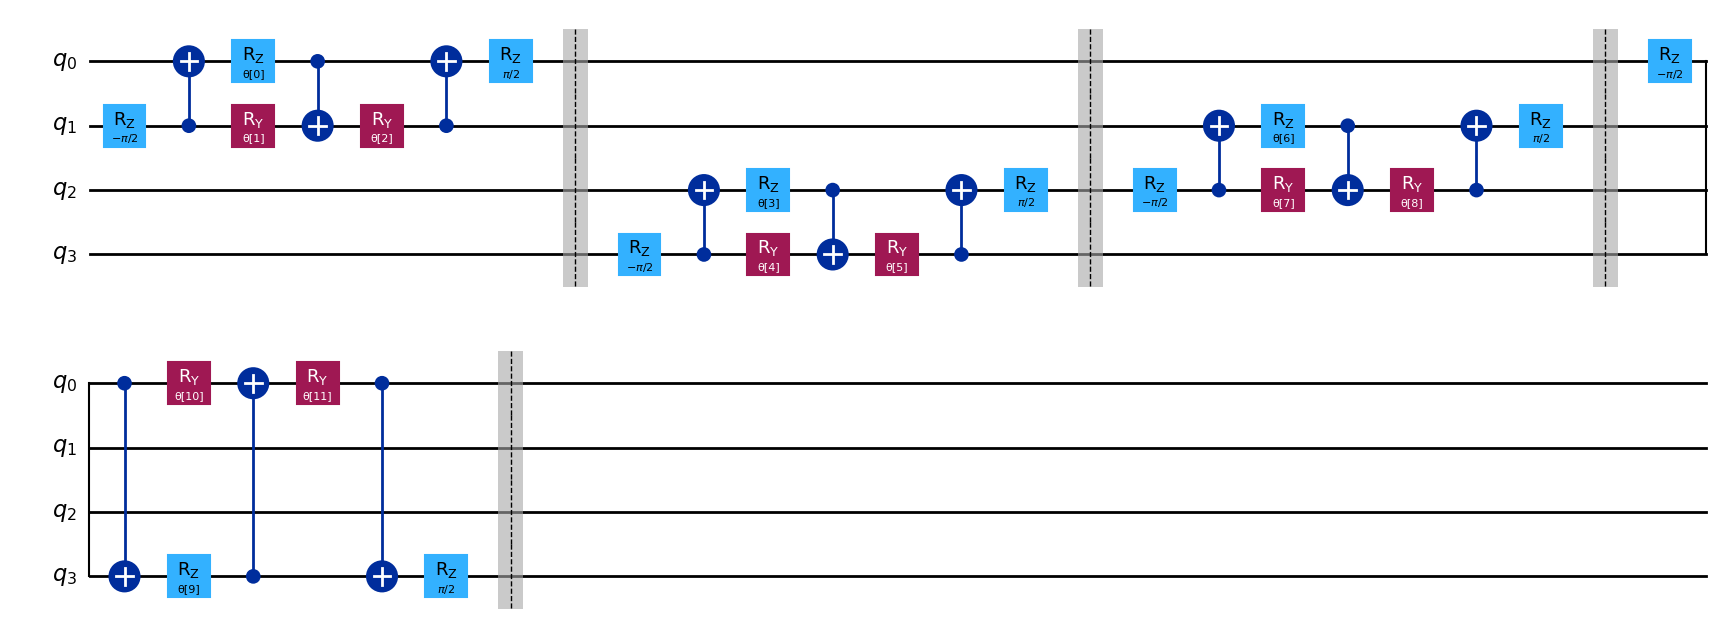

In [ ]:
def conv_layer(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 3)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)
    return qc


circuit = conv_layer(4, "θ")
circuit.decompose().draw("mpl")

In [ ]:
!pip install pylatexenc

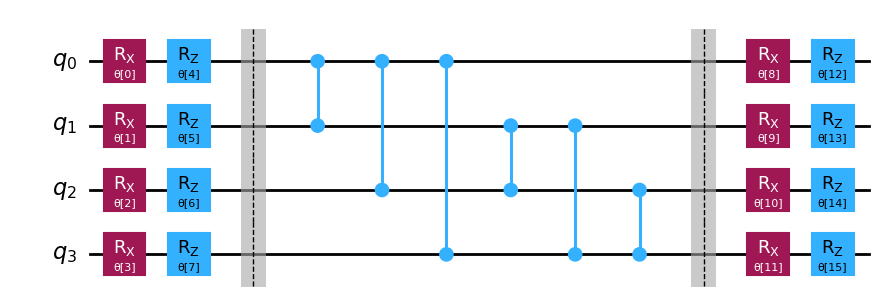

In [ ]:
from qiskit.circuit.library import TwoLocal
num_qubits = 4
feature_map = ZFeatureMap(num_qubits)
#ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2, entanglement='linear',
#                         skip_unentangled_qubits=True, insert_barriers=True)
#ansatz = EfficientSU2(num_qubits, reps = 2, entanglement='circular')
ansatz = TwoLocal(num_qubits, ['rx','rz'], 'cz', entanglement = 'full', reps=1, insert_barriers=True)
qc = QuantumCircuit(num_qubits)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

#print(ansatz)
ansatz.decompose().draw("mpl")
#feature_map.decompose().draw("mpl")

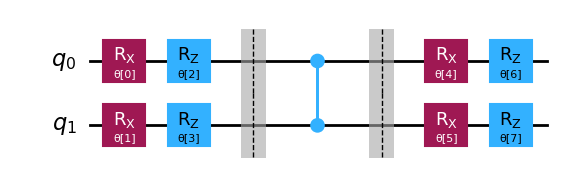

In [ ]:
#TwoLocal
from qiskit.circuit.library import TwoLocal

from qiskit.circuit.library import EfficientSU2
num_qubits = 2

#ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1, entanglement='linear',
#                         skip_unentangled_qubits=True, insert_barriers=True)
#ansatz = EfficientSU2(num_qubits, reps = 1, entanglement='circular', insert_barriers=True)
ansatz = TwoLocal(num_qubits, ['rx','rz'], 'cz', entanglement = 'full', reps=1, insert_barriers=True)
qc = QuantumCircuit(num_qubits)
qc.compose(ansatz, inplace=True)

#print(ansatz)
ansatz.decompose().draw("mpl")


In [ ]:
def create_qnn():
    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = SamplerQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )

    return qnn

qnn = create_qnn()
print("Number of parameters in QNN: ", qnn.num_weights)
initial_weights = 0.1 * (2 * algorithm_globals.random.random(qnn.num_weights) - 1)

class QDQN(nn.Module):
    def __init__(self, Ni, No, qnn_model = qnn):
        super().__init__()
        self.fc1 = nn.Linear(Ni, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, num_qubits)
        self.qnn = TorchConnector(qnn_model, initial_weights=initial_weights)
        self.fc4 = nn.Linear(pow(2, num_qubits), No)

        self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.fc3(x)
        x = self.qnn(x)
        x = self.fc4(x)

        return x

class QCNN(nn.Module):
    def __init__(self, Ni, Na):
        super().__init__()
        self.conv1 = Conv2d(Ni, 2, kernel_size=5)
        self.conv2 = Conv2d(2, 16, kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(256, 64)
        self.fc2 = Linear(64, 2)         # 2-dimensional input to QNN
        self.qnn = TorchConnector(qnn)  # Apply torch connector, weights chosen
        self.fc3 = Linear(1, 1)          # uniformly at random from interval [-1,1].
        self.fc4 = Linear(1, Na)
                                         # 1-dimensional output from QNN

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.qnn(x)  # apply QNN
        x = self.fc3(x)
        x = self.fc4(x)

        return x

NameError: name 'qc' is not defined

In [ ]:
class DQN(nn.Module):

    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

In [ ]:
# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# EPS_START is the starting value of epsilon
# EPS_END is the final value of epsilon
# EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
# TAU is the update rate of the target network
# LR is the learning rate of the ``AdamW`` optimizer
BATCH_SIZE = 8
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
#LR = 1e-4
LR = 0.003
# Get number of actions from gym action space
n_actions = env.action_space.n
# Get the number of state observations
state, info = env.reset()
n_observations = len(state)
print("Number of observations:", n_observations)

policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
#policy_net = QDQN(n_observations, n_actions, qnn_model=qnn).to(device)
#target_net = QDQN(n_observations, n_actions, qnn_model=qnn).to(device)
#policy_net = QCNN(n_observations, n_actions).to(device)
#target_net = QCNN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
#optimizer = optim.Adam(policy_net.parameters(), lr=LR)
#optimizer = optim.LBFGS(policy_net.parameters())
memory = ReplayMemory(10000)

steps_done = 0

def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return the largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long)


episode_durations = []

def plot_durations(show_result=False):
    plt.figure(1)
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())

    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

Number of observations: 4


In [ ]:
f_loss = nn.SmoothL1Loss()
loss_value = []
def closure():
    optimizer.zero_grad(set_to_none=True)  # Initialize gradient
    loss = f_loss(state_action_values, expected_state_action_values.unsqueeze(1))
    loss.backward()  # Compute gradient
    #print('loss = ', loss.item())  # Print loss
    loss_value.append(loss)
    return loss

def optimize_model():
    policy_net.train()
    target_net.train()

    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    global state_action_values
    state_action_values = policy_net(state_batch).gather(1, action_batch)
    sav = []
    sav.append(state_action_values)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0]
    # Compute the expected Q values
    global expected_state_action_values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    #criterion = nn.SmoothL1Loss()
    #loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    #optimizer.zero_grad()
    #loss.backward()
    # In-place gradient clipping
    #torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step(closure)

In [ ]:
failure_count = 0
failure_ = []
robust = []
sav = []
if torch.cuda.is_available():
    num_episodes = 1
else:
    num_episodes = 597

for i_episode in range(num_episodes):
    # Initialize the environment and get it's state
    state, info = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    #if i_episode > 50:
    #  env.force_mag = -10.0 # nominal is +10.0
    if episode == 50:
       env.env.length *= 1.1

    for t in count():
        action = select_action(state)
        sav.append(state_action_values)
        observation, reward, terminated, truncated, _ = env.step(action.item())
        robust.append(observation)
        if observation[0] > 2.4 or observation[0] < -2.4 or observation[2] > 0.2095 or observation[2] < -0.2095:
          failure_.append(t)
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated


        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        if done:
            episode_durations.append(t + 1)
            print('Episode: ', i_episode, 'duration: ', t+1)
            plot_durations()
            break


print('Complete')
plot_durations(show_result=True)
plt.ioff()
plt.show()

# Save the model
torch.save(policy_net.state_dict(), 'hybrid_1_2.pt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#sav
import pandas as pd

a = [str(y) for y in sav]
df = pd.DataFrame(a)

## save to xlsx file

filepath = 'QRL.xlsx'

df.to_excel(filepath, index=False)

In [ ]:
import pandas as pd

rob = [str(y) for y in robust]
df = pd.DataFrame(rob)

## save to xlsx file

filepath = 'QRL.xlsx'

df.to_excel(filepath, index=False)


In [ ]:
import pandas as pd
items = [int(x) for x in episode_durations]
t = [float(y) for y in loss_value]
f = [int(i) for i in failure_]
print(t)

[0.5206233859062195, 0.40767794847488403, 0.297017902135849, 0.21777549386024475, 0.1439298689365387, 0.06115260347723961, 0.02043549343943596, 0.007342982571572065, 0.014369552955031395, 0.038821667432785034, 0.07083506137132645, 0.0706888735294342, 0.055840153247117996, 0.04654374718666077, 0.017952781170606613, 0.010123755782842636, 0.012240627780556679, 0.010430320166051388, 0.009959720075130463, 0.012626650743186474, 0.015405146405100822, 0.020900500938296318, 0.02584676817059517, 0.03517836704850197, 0.029027752578258514, 0.023337600752711296, 0.018955543637275696, 0.012303994968533516, 0.01861928403377533, 0.005777303595095873, 0.014125695452094078, 0.0030237073078751564, 0.0019549797289073467, 0.004846964497119188, 0.01783045567572117, 0.0147678442299366, 0.01376262865960598, 0.0007777118007652462, 0.012002418749034405, 0.0019318327540531754, 0.0023782469797879457, 0.002286016708239913, 0.003408346325159073, 0.0019964314997196198, 0.0013463993091136217, 0.0003059987793676555, 0

In [ ]:
df = pd.DataFrame(f)

## save to xlsx file

filepath = 'QRL.xlsx'

df.to_excel(filepath, index=False)

In [ ]:

# importing pandas library
import pandas as pd
# importing matplotlib library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

df = pd.read_excel('test.xlsx')


x = df['Pole_Angle']

y = df['Cart_Position']

z = df['Loss_0']

#x = df['Pole_Angular_Velocity']
#y = df['Cart_Velocity']
#z = df['Pole_Angle']



fig = plt.figure(figsize = (5, 5))
ax = plt.axes(projection ="3d")

ax.plot_trisurf(x[0:800], y[0:800], z[0:800], color = "green", alpha=0.7)
#for angle in range(0,360):
#    ax.view_init(10,angle)

# show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/series.py:953: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


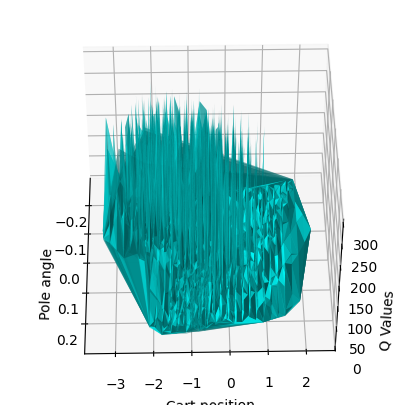

In [ ]:
# importing pandas library
import pandas as pd
# importing matplotlib library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

df = pd.read_excel('classic_g=-10.xlsx')


#z1 = df['Q_MAX']
z2 = df['Q1']
z3 = df['Q2']
z4 = df['Q3']
z5 = df['Q4']
z6 = df['Q5']
z7 = df['Q6']
z8 = df['Q7']
z9 = df['Q8']
y1 = df['cart_position_classic_g=-10']
x1 = df['pole_angle_classic_g=-10']



fig = plt.figure(figsize = (7, 5))
ax = plt.axes(projection ="3d")

#ax.plot_trisurf(x[0:2800], y[0:2800], z[0:2880], color = "blue", alpha=0.6)
#ax.plot_trisurf(x1, y1, z1, color = "aqua", alpha=0.5)
ax.plot_trisurf(x1[0:17598], y1[0:17598], z2, color = "aqua", alpha=0.5)
ax.plot_trisurf(x1[0:17598], y1[0:17598], z3, color = "aqua", alpha=0.5)
ax.plot_trisurf(x1[0:17598], y1[0:17598], z4, color = "aqua", alpha=0.5)
ax.plot_trisurf(x1[0:17598], y1[0:17598], z5, color = "aqua", alpha=0.5)
ax.plot_trisurf(x1[0:17598], y1[0:17598], z6, color = "aqua", alpha=0.5)
ax.plot_trisurf(x1[0:17598], y1[0:17598], z7, color = "aqua", alpha=0.5)
ax.plot_trisurf(x1[0:17598], y1[0:17598], z8, color = "aqua", alpha=0.5)
for angle in range(0,360):
    ax.view_init(45,angle)
#ax.set_xlim3d(-0.48, 0.48)
#ax.set_ylim3d(-2, 1.5)
#ax.set_zlim3d(0, 0.76)
ax.set_xlabel('Pole angle')
ax.set_ylabel('Cart position')
ax.set_zlabel('Q Values')

# show plot
plt.show()

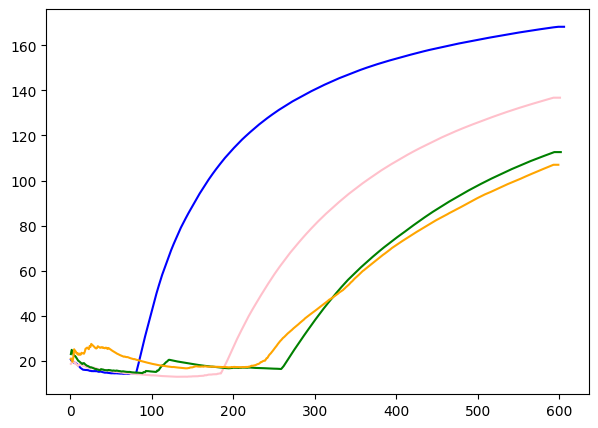

In [ ]:
# importing pandas library
import pandas as pd
# importing matplotlib library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

df = pd.read_excel('Results.xlsx')
fig = plt.figure(figsize = (7, 5))
ax = plt.axes()

x1 = df['raw_value']
y1 = df['reward_Amp_avr']
y2 = df['reward_EfficientSU2_avr']
y3 = df['reward_twolocal_avr']
y4 = df['reward_classic_avr']

ax.plot(x1, y1, 'b')
ax.plot(x1, y2, 'pink')
ax.plot(x1, y3, 'green')
ax.plot(x1, y4, 'orange')

plt.show()